# Повеќекласна класификација на старост на Abalone (вид на гастропод).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score

In [2]:
def scatterplot(dat,x,y, color='blue'):
    """
    x: name of the first column
    y: name of the second column
    color: color of the dots (optional)
    """
    plt.scatter(dat[x], dat[y], color=color, label='Data Points')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot for {x} and {y}')
    plt.show()    

def histogram(dat,x, color='blue', bins=None):
    """
    x: name of the  column
    color: color of the bins (optional)
    """
    plt.hist(dat[x], color=color, bins=bins)
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {x}')
    plt.show() 

## About the dataset

Predicted value: Rings

### Importing the dataset

#### Rings	--- Target	--- Integer	--- +1.5 gives the age in years	---	no

In [3]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv('../datasets/01_abalone/abalone.data', header=None, names=columns)
df["Age"] = df["Rings"] + 1.5

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


# Exploring the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [6]:
df['Height'].median()

0.14

In [7]:
df['Height'] = df['Height'].replace(0.0, df['Height'].median())

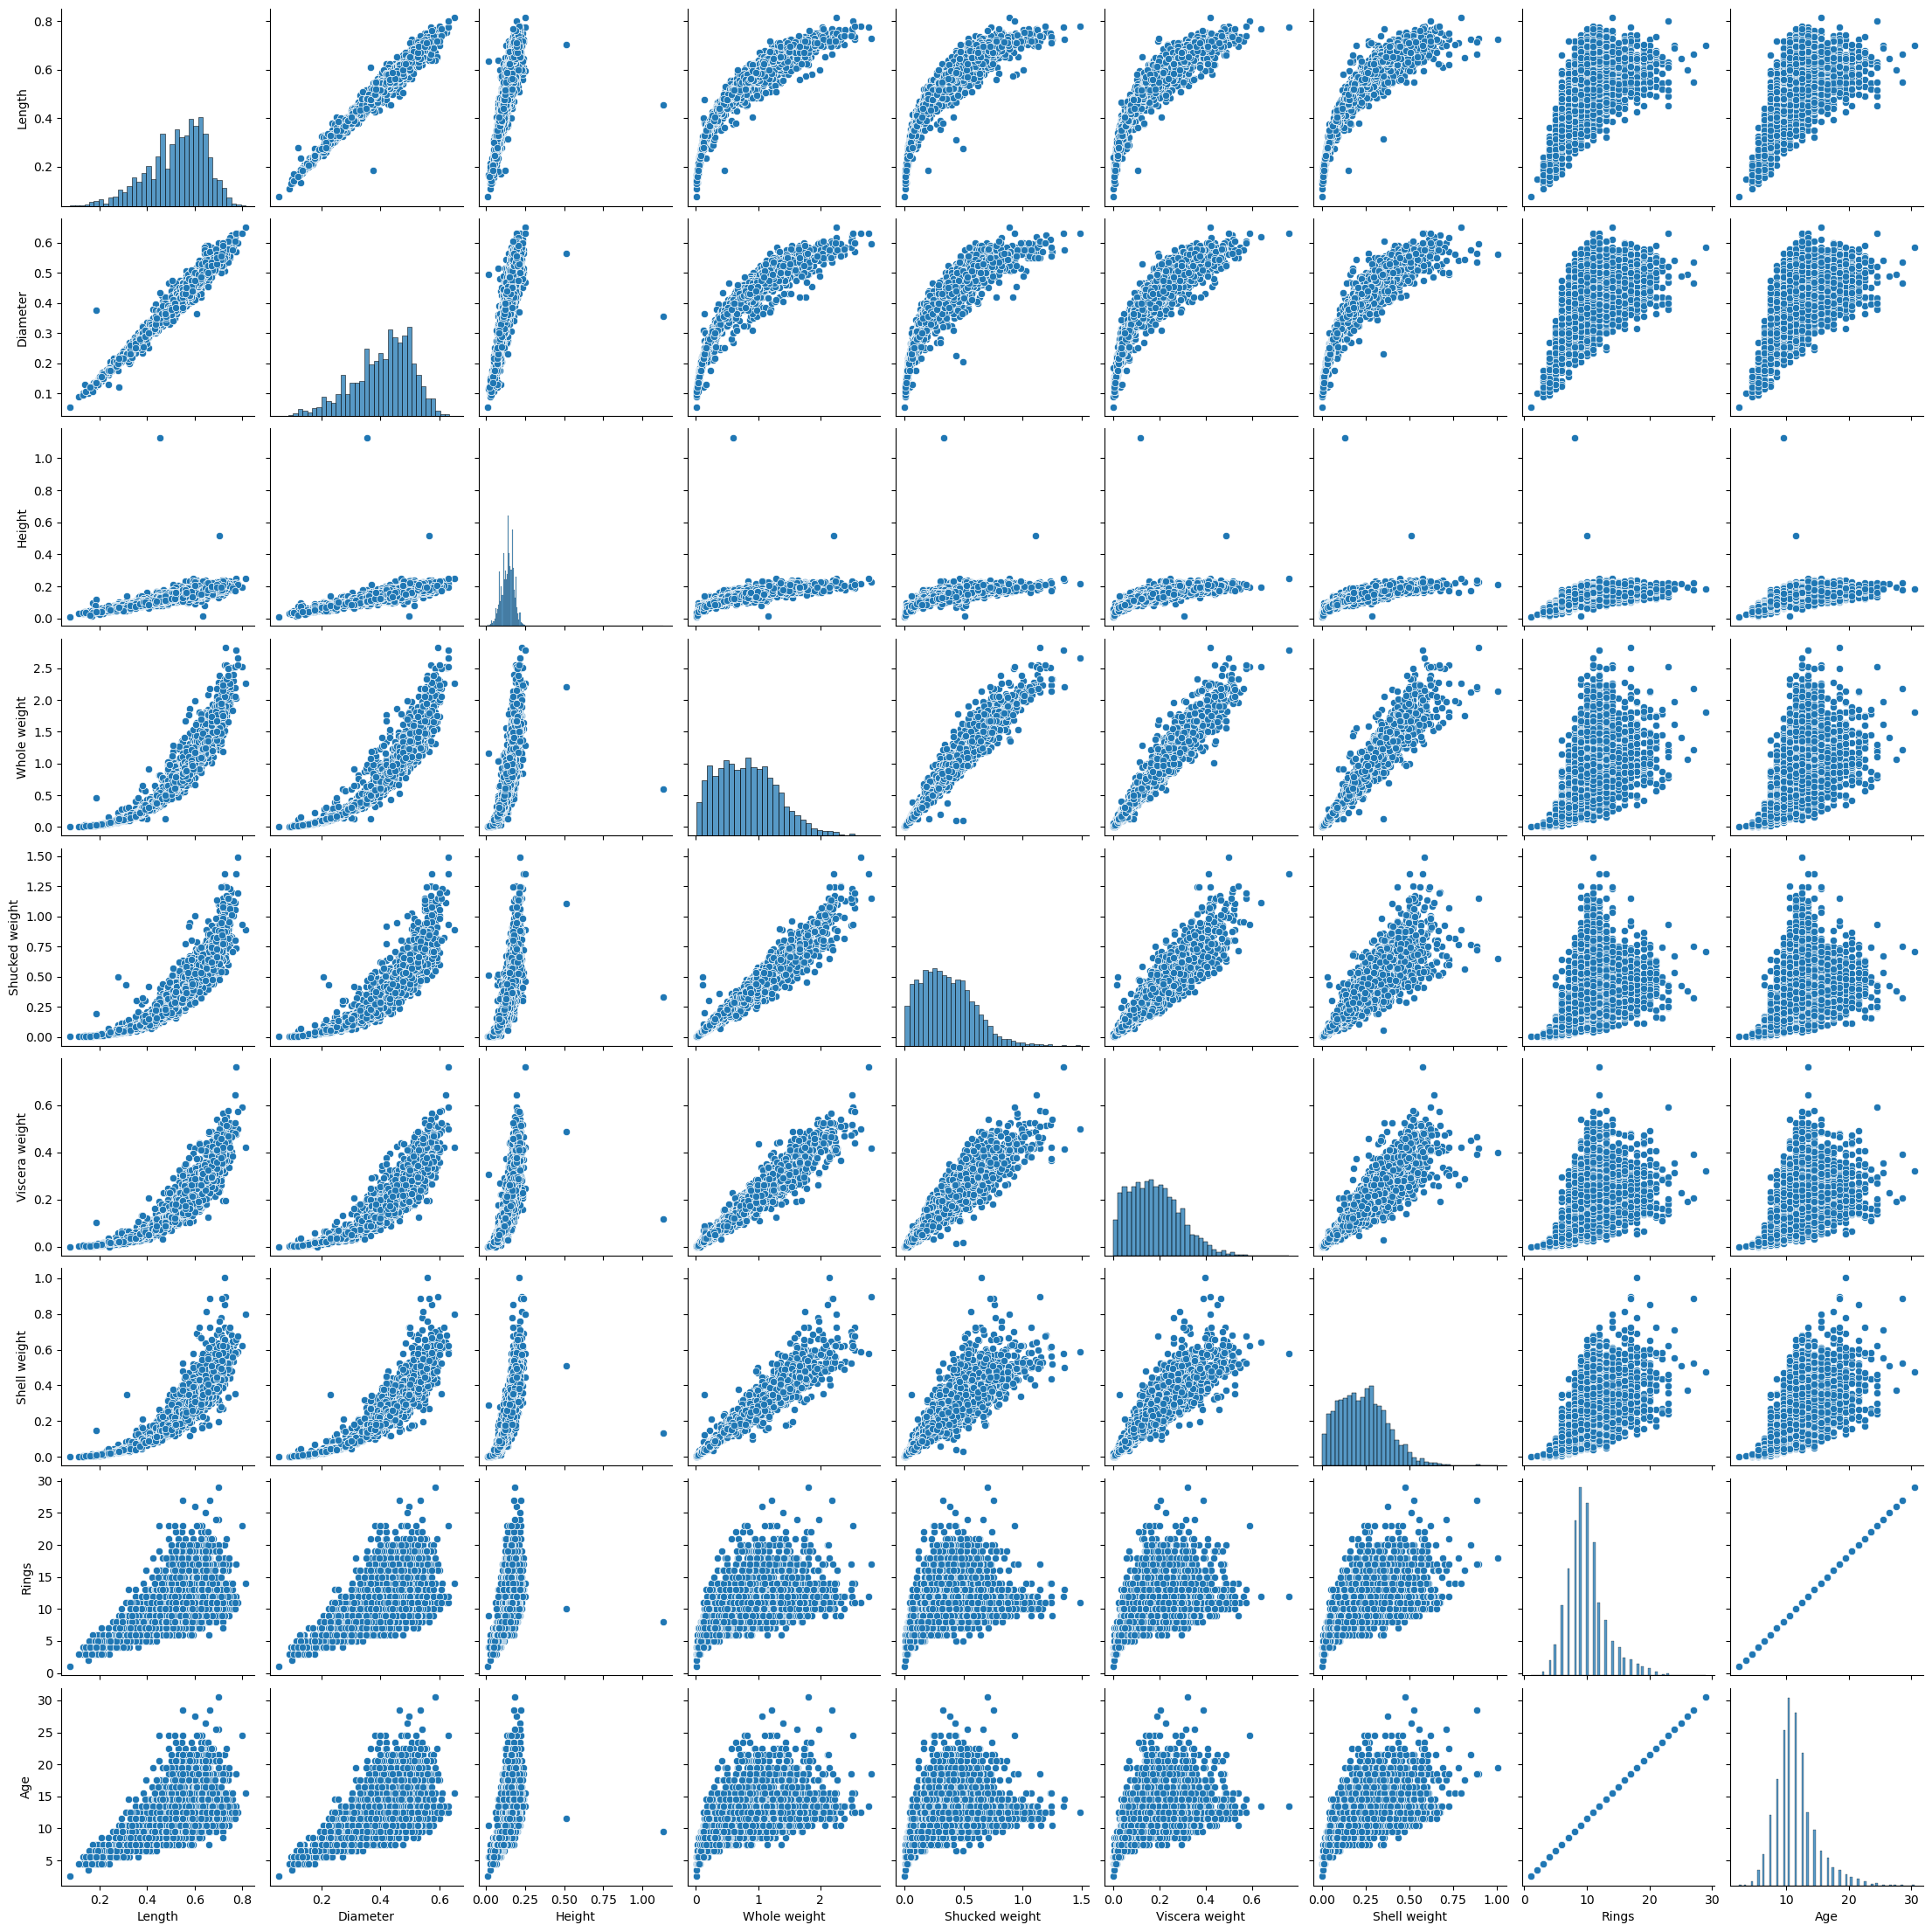

In [8]:
sns.pairplot(df)

### A lot of classes have very strong corelation with another so we have to remove some to avoid overfitting

In [9]:
df.drop(columns='Sex').corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Length,1.000000,0.986812,0.827741,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.986812,1.000000,0.833925,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.827741,0.833925,1.000000,0.819618,0.775400,0.798647,0.819455,0.557497,0.557497
Whole weight,0.925261,0.925452,0.819618,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,0.897914,0.893162,0.775400,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,0.903018,0.899724,0.798647,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,0.897706,0.905330,0.819455,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,0.556720,0.574660,0.557497,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,0.556720,0.574660,0.557497,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


<Axes: >

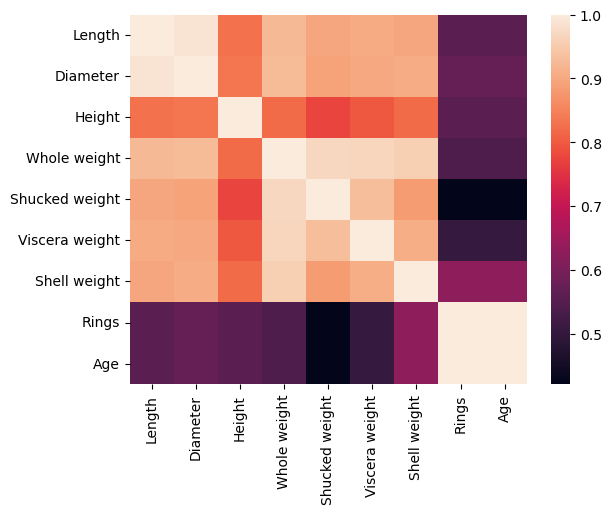

In [10]:
sns.heatmap(df.drop(columns='Sex').corr())

### Removing classes to avoid redundancy. Length is almost exactly the same as Diameter and im removing Shucked weight and Viscera Weight rather than the other 2 weights because they have a lower correlation than the other 2

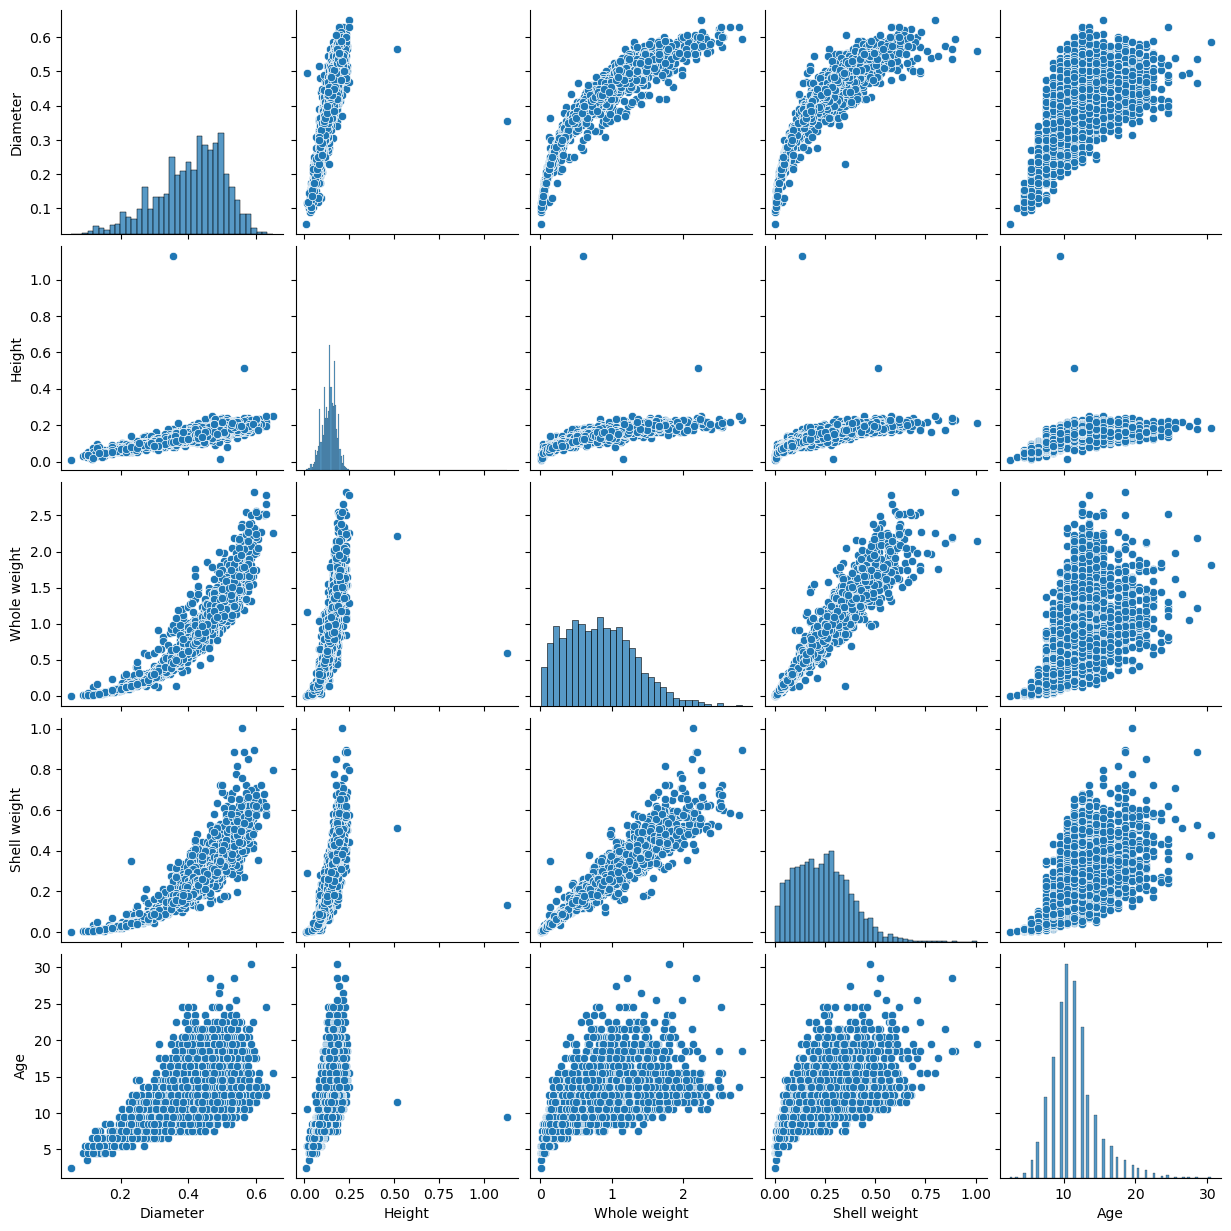

In [11]:
data = df.drop(columns=['Length', 'Shucked weight','Viscera weight', 'Rings'])
sns.pairplot(data)

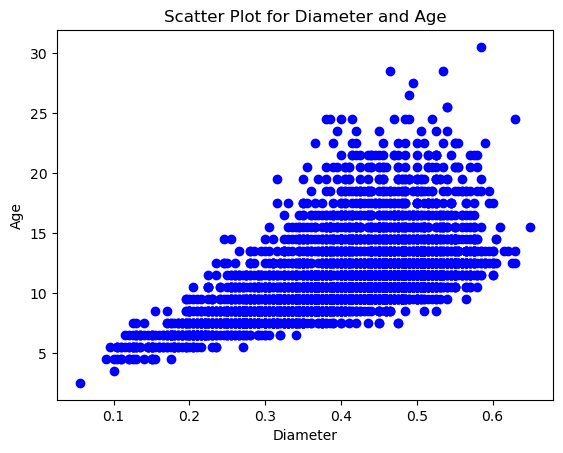

In [12]:
scatterplot(data,"Diameter", "Age")

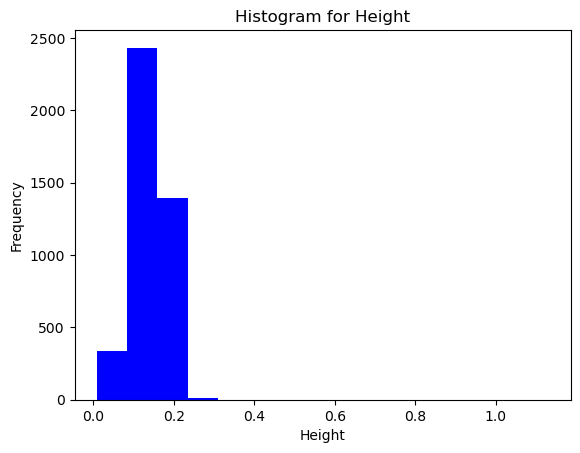

In [13]:
histogram(data,'Height', bins=15)

10.5